신경망에서 층을 쌓으려면 활성화 함수로 비선형 함수를 사용해야 한다고 앞서 언급.
- 종류 : 시그모이드 함수, ReLU 함수, Leaky ReLU 함수, tanh 함수(쌍곡탄젠트 함수), PReLu 함수, ELU(Exponential Linear Unit) 함수, Maxout 함수 등

시그모이드 함수는 신경망 초기에 많이 사용되었으나 아래와 같은 단점들 때문에 사용하지 않음:
- Gradient Vanishing 현상 발생
    - 미분 함수가 x=0에서 최댓값 1/4를 가지고, |x|가 커질 수록 0에 수렴 => Gradient Backpropagation(역전파 미분?, 출력층에서 입력층 순서로) 시 미분값이 소실될 가능성이 큼.
- 함수값이 0을 중심으로 분포하지 않음. => 학습이 지그재그 형태로 됨
- exp 함수 사용 시 비용이 큼

- tanh 함수(Hyperbolic tangent function) : 시그모이드 함수처럼 S자 모양의 그래프로 표시되나, 출력값은 그와 달리 -1 ~ 1 사이의 값을 가짐
    - 함수의 중심값을 0으로 옮겨 최적화 과정 문제 해결
    - Gradient Vanishing 현상은 존재

$$tanh(x) =\frac { { e }^{ x }-{ e }^{ -x } }{ { e }^{ x }+{ e }^{ -x } }$$

- Leaky ReLU 함수 : ReLu의 뉴런이 죽는 현상(Dying ReLU)을 해결하기 위해 나온 함수
    - 음수에서 미분값이 0이 되지 않음
    - Dying ReLU : ReLU에서 음수 범위의 값이 노드로 들어왔다고 할 때, 역전파하면 0이 가중치에 곱해지면서 해당 노드가 죽는 현상
        - 학습에 전혀 도움 안 됨
    - 임의로 지정한 c 상수는 매우 작은 값을 의미

$$f(x)=max(cx,x)$$

- PReLu : 새로운 파라미터 α를 추가하여, x < 0에서 기울기를 학습할 수 있도록 함

$$f(x)=max(\alpha x,x)$$

- ELU(Exponential Linear Unit) :
    - Dying ReLU 현상 해결
    - 출력값이 거의 0을 중심으로 분포
    - 하지만 ReLU 함수와 달리 지수 함수가 포함되어 있어 이의 계산 비용이 발생
 비용을 0으로 더 빨리 수렴하고, 보다 정확한 결과를 도출. 항상 양수인 상수 α가 존재. 마이너스 값의 입력을 제외하고 ReLu와 매우 유사.

$$f(x)=x\quad if\quad x>0$$
$$f(x)=\alpha ({ e }^{ x }-1)\quad if\quad x\le 0$$

- Maxout 함수 : 활성 함수를 구간 선형 함수로 가정하고, 각 뉴런에 최적화된 활성 함수를 탐색, ReLU의 일반화된 형태라고 볼 수 있음.
    - Dying ReLU 현상 해결
    - 계산량이 복잡함

$$f(x)=max({ w }_{ 1 }^{ T }x+{ b }_{ 1 },{ w }_{ 2 }^{ T }x+{ b }_{ 2 })$$

- Swish 함수 : 선형 함수 x와 시그모이드 σ(x)의 곱으로 정의, ReLU나 ELU와 비슷한 모양이지만 원점 근처의 음수 구간에서 잠시 볼록 튀어 나왔다가 다시 0으로 포화하는 곡선 모양

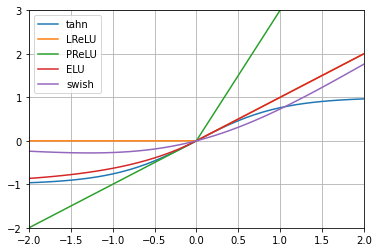

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def tahn(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
# numpy에서 np.tahn() 함수를 제공한다고 함.

h = 1e-4
def LReLu(x):
    return np.maximum(h*x, x)

def PReLu(a, x):
    return np.maximum(a*x, x)

def ELU(a, x):
    return (x>0)*x + (x<=0)*(a*(np.exp(x)-1))

def swish(x):
    return x * sigmoid(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-4, 4, 0.1)

plt.plot(x, tahn(x), label="tahn")
plt.plot(x, LReLu(x), label="LReLU")
plt.plot(x, PReLu(3, x), label="PReLU")
plt.plot(x, ELU(1, x), label="ELU")
plt.plot(x, swish(x), label="swish")

plt.xlim(-2, 2)
plt.ylim(-2, 3)
plt.legend()
plt.grid()
plt.show()

In [35]:
def gradient_function(f, x):
    h = 1e-4
    if f == PReLu:
        return (f(3, x+h)-f(3, x-h))/(2*h) # 임의의 값(3) 입력
    elif f == ELU:
        return (f(1, x+h)-f(1, x-h))/(2*h) # 임의의 값(1) 입력
    else:
        return (f(x+h)-f(x-h))/(2*h)

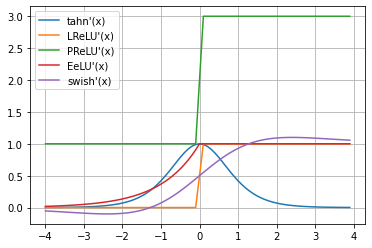

In [36]:
plt.plot(x, gradient_function(tahn, x), label="tahn'(x)")
plt.plot(x, gradient_function(LReLu, x), label="LReLU'(x)")
plt.plot(x, gradient_function(PReLu, x), label="PReLU'(x)")
plt.plot(x, gradient_function(ELU, x), label="EeLU'(x)")
plt.plot(x, gradient_function(swish, x), label="swish'(x)")

plt.legend()
plt.grid()
plt.show()

- 응용
Leaky ReLU 함수는 역전파에 쓰이지 않을까?